In [1]:
%pylab inline
import pandas as pd
import numpy as np

import fmt
from numpy import linalg as LA

Populating the interactive namespace from numpy and matplotlib


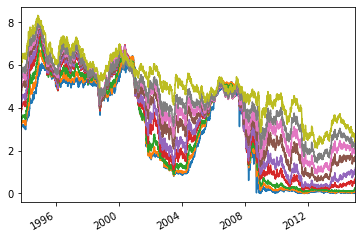

In [2]:
cmturl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/cmt.csv"
cmt_rates = pd.read_csv(cmturl, parse_dates=[0], index_col=[0])

cmt_rates.plot(legend=False);
tenors = cmt_rates.columns.map(float)
tenorTags = ['T=%g' % m for m in tenors]

In [3]:
cmt_rates.head()

,0.25,0.5,1,2,3,5,7,10,20
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11


In [4]:
#compute correlation matrix and covariance matrix
daily_change = (cmt_rates - cmt_rates.shift())
daily_change = daily_change[1:]
corr = daily_change.corr()
cov = daily_change.cov()
cov

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.002831,0.001794,0.001446,0.001216,0.001179,0.001067,0.000927,0.000797,0.000586
0.5,0.001794,0.001924,0.001650,0.001576,0.001564,0.001465,0.001319,0.001165,0.000911
1,0.001446,0.001650,0.002080,0.002207,0.002228,0.002143,0.001974,0.001761,0.001419
2,0.001216,0.001576,0.002207,0.003297,0.003341,0.003314,0.003114,0.002794,0.002281
3,0.001179,0.001564,0.002228,0.003341,0.003705,0.003706,0.003534,0.003204,0.002661
5,0.001067,0.001465,0.002143,0.003314,0.003706,0.004107,0.003987,0.003675,0.003143
7,0.000927,0.001319,0.001974,0.003114,0.003534,0.003987,0.004133,0.003810,0.003352
10,0.000797,0.001165,0.001761,0.002794,0.003204,0.003675,0.003810,0.003709,0.003281
20,0.000586,0.000911,0.001419,0.002281,0.002661,0.003143,0.003352,0.003281,0.003200


In [5]:
# PCA on Cov matrix and Corr matrix
eigval_cov,eigvec_cov = LA.eig(cov)
eigval_corr,eigvec_corr = LA.eig(corr)

print('PC for Cov matrix: ')
pd.DataFrame(eigvec_cov)

PC for Cov matrix: 


,0,1,2,3,4,5,6,7,8
0,0.148000,0.688984,0.488216,0.487285,0.159330,-0.046924,-0.002038,-0.001615,-0.001168
1,0.182570,0.479154,0.039241,-0.561285,-0.538932,0.359238,0.030721,0.004679,0.005779
2,0.246674,0.318504,-0.255272,-0.469203,0.433754,-0.597267,-0.086100,0.006391,-0.008243
3,0.355706,0.103908,-0.483054,0.167989,0.319827,0.427732,0.550965,-0.055194,0.096245
4,0.390303,0.018434,-0.365385,0.257474,-0.066142,0.181406,-0.679137,0.172841,-0.345168
5,0.418395,-0.114600,-0.074632,0.200808,-0.360371,-0.274105,-0.102056,-0.421996,0.610264
6,0.414131,-0.201476,0.154755,0.064563,-0.256205,-0.278915,0.332474,0.709097,-0.054711
7,0.384378,-0.233168,0.287363,-0.076207,-0.024825,-0.072089,0.197791,-0.524712,-0.623894
8,0.332789,-0.273931,0.464757,-0.287311,0.439585,0.371528,-0.258408,0.103882,0.326855


In [6]:
print('PC for Corr matrix: ')
pd.DataFrame(eigvec_corr)

PC for Corr matrix: 


,0,1,2,3,4,5,6,7,8
0,0.187409,-0.622472,-0.531805,0.519887,0.155530,-0.010658,0.001076,0.001516,0.000047
1,0.268234,-0.527518,-0.007644,-0.568086,-0.566795,-0.075295,-0.002874,-0.003239,-0.007139
2,0.332351,-0.300504,0.368168,-0.309327,0.707374,0.257800,-0.003647,-0.000217,0.034017
3,0.363468,-0.013768,0.437957,0.300995,-0.040344,-0.571589,0.038750,-0.064877,-0.501243
4,0.372111,0.063305,0.294790,0.298577,-0.190067,-0.043953,-0.185139,0.311089,0.715798
5,0.373994,0.165366,0.034868,0.167815,-0.200627,0.412306,0.534750,-0.551362,0.056573
6,0.366274,0.228761,-0.151339,0.028115,-0.105943,0.364817,-0.734084,-0.115888,-0.305275
7,0.357700,0.260241,-0.270822,-0.096594,0.007149,0.133312,0.372571,0.706161,-0.257595
8,0.331539,0.303892,-0.453218,-0.305425,0.254748,-0.527494,-0.023516,-0.287939,0.269133


In [7]:
print('Eigenvalues for Cov matrix:')
print(eigval_cov)
print('Eigenvalues for Corr matrix: ')
print(eigval_corr)

Eigenvalues for Cov matrix:
[2.24842162e-02 4.01078584e-03 1.29094573e-03 5.05670534e-04
 2.39726493e-04 1.79414699e-04 1.15913249e-04 7.57286361e-05
 8.51231080e-05]
Eigenvalues for Corr matrix: 
[6.61918217 1.5299801  0.41697627 0.20086459 0.10217809 0.05714188
 0.01883997 0.02251148 0.03232545]


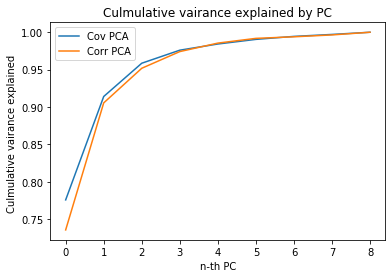

In [8]:
# In terms of variance explained
varEx_cov = [0.]*len(eigval_cov)
varEx_corr = [0.]*len(eigval_corr)
totalVar_cov = sum(eigval_cov)
totalVar_corr = sum(eigval_corr)

for i in range(len(eigval_cov)):
    varEx_cov[i] = sum(eigval_cov[:i+1])/ totalVar_cov 
    
for i in range(len(eigval_corr)):
    varEx_corr[i] = sum(eigval_corr[:i+1])/ totalVar_corr 


plt.plot(varEx_cov)
plt.plot(varEx_corr)
plt.title('Culmulative vairance explained by PC')
plt.xlabel('n-th PC')
plt.ylabel('Culmulative vairance explained ')
plt.legend(['Cov PCA','Corr PCA'])

    
    

Normally when the Cov matrix have data on the similar scale, the PCA on Cov and Corr matrix should be equivalent. Here in the above example, we see that the values of eigvectors from 2 PCA are similar, the culmulative variance explained looks similar, so we can say that they are equivalent in the sense of explaining variance

In [9]:
n_Cov, n_Corr = 0, 0
for i in range(len(varEx_cov)):
    if varEx_cov[i]>=0.95:
        n_Cov = i+1
        break
        
for i in range(len(varEx_cov)):
    if varEx_corr[i]>=0.95:
        n_Corr = i+1
        break

print(n_Cov, ' principal components are required to explain 95% of the variance in Cov matrix')
print(n_Corr, ' principal components are required to explain 95% of the variance in Corr matrix')


        

3  principal components are required to explain 95% of the variance in Cov matrix
3  principal components are required to explain 95% of the variance in Corr matrix


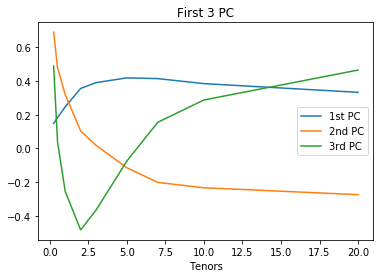

In [10]:
# first 3 PC for the Cov matrix
pc1 = eigvec_cov[:,0]
pc2 = eigvec_cov[:,1]
pc3 = eigvec_cov[:,2]

tenors = [0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0]
plt.plot(tenors,pc1)
plt.plot(tenors,pc2)
plt.plot(tenors,pc3)
plt.legend(['1st PC','2nd PC','3rd PC'])
plt.xlabel('Tenors')
plt.title('First 3 PC')
plt.show()

The first 3 PC have level, steepness, curvature interpretation. 

The first component representing “level”, the general level of interest rates, where all rates go up or down by the same amount. It shows that the change of yield of long-term bonds with maturity less than 5 yrs is higher than that of shorter-term bonds. 

The second component representing steepness explains how rapidly the yield curve goes up (or down) from short rates to longer rates. 

The third component representing “curvature”, which is a butterfly shape that occurs between short, medium, and long-term rates.

In [11]:
# plot the the factor loading (or the projection) to the first 3 principal components

# Make a list of (eigenvalue, eigenvector) tuples (eigenvectors[:,i] gets i+1 th column)
eigenpairs = [(np.abs(eigval_cov[i]), eigvec_cov[:,i]) for i in range(len(eigval_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigenpairs.sort(key=lambda k: k[0], reverse=True)

# construct projection matrix W from the “top” k eigenvectors.
# choose 3 pc b/c they expalin 95% of variace
w = np.hstack((eigenpairs[0][1][:, np.newaxis], eigenpairs[1][1][:, np.newaxis],eigenpairs[2][1][:, np.newaxis]))
print('W=\n', w)

W=
 [[ 0.14800018  0.68898406  0.4882156 ]
 [ 0.18256961  0.47915405  0.03924057]
 [ 0.24667445  0.3185038  -0.25527152]
 [ 0.35570586  0.10390755 -0.48305379]
 [ 0.39030298  0.01843433 -0.36538487]
 [ 0.41839478 -0.11459977 -0.07463217]
 [ 0.41413067 -0.20147591  0.15475527]
 [ 0.38437769 -0.23316821  0.28736263]
 [ 0.33278869 -0.27393068  0.46475655]]


In [12]:
projection = daily_change.dot(w)
projection

,0,1,2
1993-10-04,0.005927,0.061589,0.017359
1993-10-05,0.048985,0.041926,0.013879
1993-10-06,-0.029450,-0.024057,0.008580
1993-10-07,-0.030854,0.000408,0.010316
1993-10-08,-0.175563,0.050813,-0.019112
...,...,...,...
2014-12-19,-0.059337,0.034824,-0.048349
2014-12-22,0.042335,0.043520,-0.033939
2014-12-23,0.149840,-0.101728,0.048282
2014-12-24,0.013883,-0.019232,-0.010549


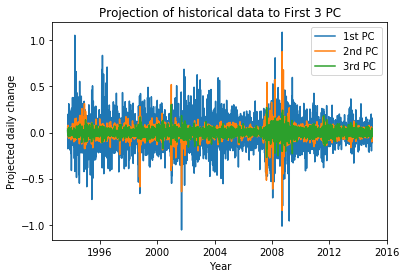

In [13]:
plt.plot(projection)
plt.legend(['1st PC','2nd PC','3rd PC'])
plt.xlabel('Year')
plt.ylabel('Projected daily change')
plt.title('Projection of historical data to First 3 PC')
plt.show()


Use the PCA of the covariance matrix: 
$$
\scriptsize
V = R_V \Lambda_V R_V^T \approx \dot R_V \dot \Lambda_V \dot R_V^T = \dot R_V \dot H_V \dot H_V^T  \dot R_V^T = (\overbrace{\dot R_V \dot H_V}^{L_V})(\dot R_V\dot H_V )^T \\
$$


Simulation can then be driven by $\delta w = \dot R_V \dot H_V \dot z \sqrt{\delta t}$

Then we use Vasicek model (O-U process)  $$\delta r = (\mu-r)\delta t + \sigma \delta w_t$$
where   $\sigma = 1$
to model our change in rates

In [14]:
cmt_rates.tail()

,0.25,0.5,1,2,3,5,7,10,20
2014-12-19,0.04,0.11,0.26,0.67,1.10,1.66,1.98,2.17,2.48
2014-12-22,0.05,0.16,0.28,0.71,1.13,1.67,1.98,2.17,2.47
2014-12-23,0.03,0.14,0.26,0.73,1.17,1.76,2.06,2.26,2.57
2014-12-24,0.01,0.14,0.26,0.73,1.18,1.76,2.09,2.27,2.56
2014-12-26,0.01,0.10,0.26,0.73,1.19,1.75,2.07,2.25,2.54


In [15]:
LAMBDA = np.diag([eigval_cov[0],eigval_cov[1],eigval_cov[2]])
R = w
H = np.sqrt(LAMBDA)
L = R@H

dt = 1/250
mu = np.array(np.mean(cmt_rates))
sigma = 1

#  simulate the daily interest rate changes up to the future time of 20Y 
r = np.zeros((250*20,9))
dr = np.zeros((250*20-1,9))

r[0] = np.array(cmt_rates.loc['2014-12-26'])
for i in range(len(r)-1):
    Z = np.random.normal(0,1,3) # 3x3
    dr[i] = (mu-r[i])*dt+sigma*L@Z
    r[i+1] = r[i]+dr[i]

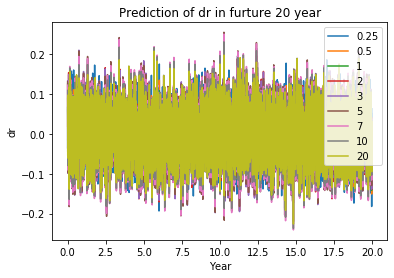

In [16]:
x = np.array([n/250 for n in range (250*20-1)])
plt.plot(x,dr)
plt.xlabel('Year')
plt.ylabel('dr')
plt.title('Prediction of dr in furture 20 year')
plt.legend(cmt_rates.columns)
plt.show()

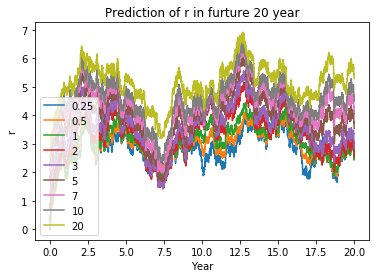

In [17]:
x = np.array([n/250 for n in range (250*20)])
plt.plot(x,r)
plt.xlabel('Year')
plt.ylabel('r')
plt.title('Prediction of r in furture 20 year')
plt.legend(cmt_rates.columns)
plt.show()

In [18]:
cov_simulated = pd.DataFrame(dr).cov()
cov_simulated.rename(columns={0:'0.25',1:'0.5',2:'1',3:'2',4:'3',5:'5',6:'7',7:'10',8:'20'},
                    index = {0:'0.25',1:'0.5',2:'1',3:'2',4:'3',5:'5',6:'7',7:'10',8:'20'})

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.002749,0.002016,0.001618,0.001269,0.001223,0.001125,0.001004,0.000889,0.000699
0.5,0.002016,0.001741,0.001696,0.001743,0.001731,0.001603,0.001422,0.001235,0.000937
1,0.001618,0.001696,0.001960,0.002394,0.002445,0.002337,0.002120,0.001859,0.001443
2,0.001269,0.001743,0.002394,0.003357,0.003536,0.003531,0.003312,0.002963,0.002399
3,0.001223,0.001731,0.002445,0.003536,0.003791,0.003897,0.003739,0.003397,0.002832
5,0.001125,0.001603,0.002337,0.003531,0.003897,0.004202,0.004172,0.003878,0.003366
7,0.001004,0.001422,0.002120,0.003312,0.003739,0.004172,0.004242,0.004000,0.003561
10,0.000889,0.001235,0.001859,0.002963,0.003397,0.003878,0.004000,0.003807,0.003440
20,0.000699,0.000937,0.001443,0.002399,0.002832,0.003366,0.003561,0.003440,0.003184


In [19]:
cov = daily_change.cov()
cov

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.002831,0.001794,0.001446,0.001216,0.001179,0.001067,0.000927,0.000797,0.000586
0.5,0.001794,0.001924,0.001650,0.001576,0.001564,0.001465,0.001319,0.001165,0.000911
1,0.001446,0.001650,0.002080,0.002207,0.002228,0.002143,0.001974,0.001761,0.001419
2,0.001216,0.001576,0.002207,0.003297,0.003341,0.003314,0.003114,0.002794,0.002281
3,0.001179,0.001564,0.002228,0.003341,0.003705,0.003706,0.003534,0.003204,0.002661
5,0.001067,0.001465,0.002143,0.003314,0.003706,0.004107,0.003987,0.003675,0.003143
7,0.000927,0.001319,0.001974,0.003114,0.003534,0.003987,0.004133,0.003810,0.003352
10,0.000797,0.001165,0.001761,0.002794,0.003204,0.003675,0.003810,0.003709,0.003281
20,0.000586,0.000911,0.001419,0.002281,0.002661,0.003143,0.003352,0.003281,0.003200


We can see that the simulated cov matrix using first 3 PC are actually quite similar to our oringal cov matrix. This follows from the fact that thr first 3 PC explain most of the variance (>95%) in this problem

In [20]:
r = pd.DataFrame(r)
mean = r.mean()
std = r.std()
q2 = r.quantile(0.02)
q98 =r.quantile(0.98)

In [21]:
stats = pd.DataFrame([mean,std,q2,q98])
stats = stats.set_index(pd.Index(['mean','standard dev','2% quantile','98% quantile']))
stats = stats.rename(columns={0:'0.25',1:'0.5',2:'1',3:'2',4:'3',5:'5',6:'7',7:'10',8:'20'})
                    
stats

,0.25,0.5,1,2,3,5,7,10,20
mean,2.806897,2.901475,3.020296,3.323404,3.566955,3.999719,4.333293,4.582976,5.124407
standard dev,0.560040,0.563743,0.646665,0.796620,0.810537,0.814216,0.800380,0.756771,0.703192
2% quantile,1.660253,1.585932,1.650311,1.587848,1.662562,1.893543,2.237876,2.635271,3.362632
98% quantile,3.814136,3.870414,4.149171,4.814982,5.160098,5.727521,6.030229,6.149989,6.500174


In [22]:
def progression_stats(r):
    mean = np.zeros(len(r))
    std= np.zeros(len(r))
    q2 = np.zeros(len(r))
    q98 = np.zeros(len(r))
    
    for i in range(len(r)):
        mean[i] = r[:i].mean()
        std[i] = r[:i].std()
        q2[i] = r[:i].quantile(0.02)
        q98[i] =r[:i].quantile(0.98)
    
    return mean,std,q2,q98

In [23]:
mean_1y,std_1y,q2_1y,q98_1y = progression_stats(r.loc[:,2])

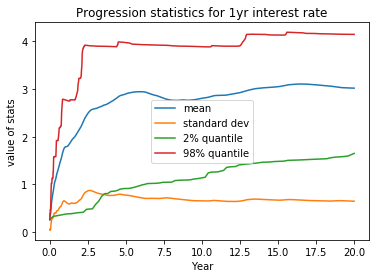

In [24]:
# Plot the evolution of these statistical metrics over time for the 1Y term rates
x = np.array([n/250 for n in range (len(r))])
plt.plot(x,mean_1y)
plt.plot(x,std_1y)
plt.plot(x,q2_1y)
plt.plot(x,q98_1y)
plt.xlabel('Year')
plt.ylabel('value of stats')
plt.title('Progression statistics for 1yr interest rate')
plt.legend(['mean','standard dev','2% quantile','98% quantile'],loc='best')
plt.show()

In [25]:
mean_10y,std_10y,q2_10y,q98_10y = progression_stats(r.loc[:,7])

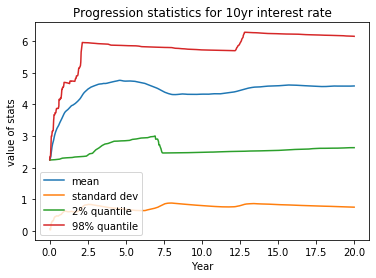

In [26]:
# Plot the evolution of these statistical metrics over time for the 10Y term rates
x = np.array([n/250 for n in range (len(r))])
plt.plot(x,mean_10y)
plt.plot(x,std_10y)
plt.plot(x,q2_10y)
plt.plot(x,q98_10y)
plt.xlabel('Year')
plt.ylabel('value of stats')
plt.title('Progression statistics for 10yr interest rate')
plt.legend(['mean','standard dev','2% quantile','98% quantile'],loc='best')
plt.show()

In [27]:
mean = cmt_rates.mean()
std = cmt_rates.std()
q2 = cmt_rates.quantile(0.02)
q98 =cmt_rates.quantile(0.98)

stats_h = pd.DataFrame([mean,std,q2,q98])
stats_h = stats_h.set_index(pd.Index(['mean','standard dev','2% quantile','98% quantile']))
stats_h = stats_h.rename(columns={0:'0.25',1:'0.5',2:'1',3:'2',4:'3',5:'5',6:'7',7:'10',8:'20'})
                    
stats_h

,0.25,0.5,1,2,3,5,7,10,20
mean,2.773512,2.909953,3.036401,3.318963,3.533491,3.935581,4.261775,4.521637,5.090491
standard dev,2.220534,2.266371,2.265373,2.236422,2.135847,1.905646,1.735445,1.528212,1.385332
2% quantile,0.020000,0.050000,0.100000,0.240000,0.350000,0.710000,1.122400,1.710000,2.450000
98% quantile,6.108200,6.337600,6.370000,6.797600,6.920000,7.200000,7.337600,7.440000,7.775200


In [28]:
print('historical 1yr 2% quantile is: ',stats_h.loc['2% quantile','1'])
print('simulated 1yr 2% quantile is: ',stats.loc['2% quantile','1'])
print('historical 1yr 98% quantile is: ',stats_h.loc['98% quantile','1'])
print('simulated 1yr 98% quantile is: ',stats.loc['98% quantile','1'])

historical 1yr 2% quantile is:  0.1
simulated 1yr 2% quantile is:  1.6503113005060126
historical 1yr 98% quantile is:  6.3699998860000004
simulated 1yr 98% quantile is:  4.149170525672688


In [29]:
print('historical 10yr 2% quantile is: ',stats_h.loc['2% quantile','10'])
print('simulated 10yr 2% quantile is: ',stats.loc['2% quantile','10'])
print('historical 10yr 98% quantile is: ',stats_h.loc['98% quantile','10'])
print('simulated 10yr 98% quantile is: ',stats.loc['98% quantile','10'])

historical 10yr 2% quantile is:  1.71
simulated 10yr 2% quantile is:  2.6352713509581265
historical 10yr 98% quantile is:  7.440000057000001
simulated 10yr 98% quantile is:  6.1499887229970405


The simulated quantiles are close to but not exactly equal to historical quantiles. 
It can be seen that simulated path have lower volatility than historical path, this may due to in our model we assume vol is constant and it is actually not in real world

To make the simulated path more realistic, at least we should model volatility as stochastic as well.

In our case, I think to apply PCA to the covariance (or correlation) matrix of the changes is better. Because we are more interested in measuring the correlation between changes in the interest rate than measuring the interest rate itself. But that's not to say that it is unreasonable to apply PCA to levels. It is possible to apply PCA on levels and consider the eigenvectors as potentially cointegrating vectors. So we can construct factors and apply cointegration tests to the factors and include them in an ECM if significant.

In [31]:
!jupyter nbconvert --to script PCA.ipynb

[NbConvertApp] Converting notebook PCA.ipynb to script
[NbConvertApp] Writing 9687 bytes to PCA.py
